In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [5]:
df = pd.read_csv('SpotifyFeatures.csv')

In [6]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [7]:
# Step 2: Select smaller subset of relevant audio features
features = ['danceability','energy','valence','tempo']
spotify_df = df[features].dropna()

In [8]:
# Downsample dataset to make it light (1000 songs only)
spotify_df = spotify_df.sample(n=1000, random_state=42)

In [9]:
# Step 3: Create target label (Happy vs Sad based on valence)
spotify_df['mood'] = spotify_df['valence'].apply(lambda x: 1 if x >= 0.5 else 0)
#valence means the emotional positiveness or negativity of a musical piece

print("Dataset Shape:", spotify_df.shape)
print("Target classes: 0 = Sad, 1 = Happy")

Dataset Shape: (1000, 5)
Target classes: 0 = Sad, 1 = Happy


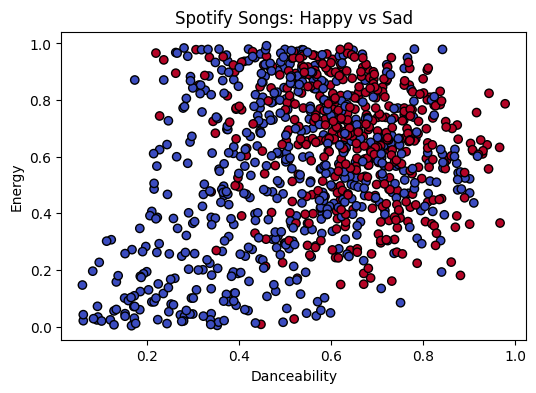

In [10]:
# Step 4: Simple visualization (scatter plot of danceability vs energy)
plt.figure(figsize=(6,4))
plt.scatter(spotify_df['danceability'], spotify_df['energy'], c=spotify_df['mood'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Spotify Songs: Happy vs Sad')
plt.show()

In [11]:
# Step 5: Split dataset
X = spotify_df[features]
y = spotify_df['mood']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Step 6: Scale the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Step 7: Train the SVM model (RBF kernel)
svm_clf = SVC(kernel='rbf', C=2, gamma='scale') #Higher C value means more complex curve

#You can fiddle with these parameters to figure out how it influences the decision boundary
svm_clf.fit(X_train, y_train)

SVC(C=2)

In [14]:
# Step 8: Accuracy
accuracy = svm_clf.score(X_test, y_test)
print("\nSVM Model Accuracy:", accuracy)


SVM Model Accuracy: 0.995


Try changing the kernel in SVC to 'linear' or 'poly' and re-run to see how accuracy changes!

In [ ]:
#Decision Boundary Visualization

# Use only 2 features for visualization
X_vis = spotify_df[['danceability', 'energy']]
y_vis = spotify_df['mood']

# Train-test split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

# Scale
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

# Train SVM
svm_vis = SVC(kernel='rbf', C=2, gamma='scale')
svm_vis.fit(X_train_vis_scaled, y_train_vis)

# Create meshgrid for boundary
x_min, x_max = X_vis['danceability'].min()-0.05, X_vis['danceability'].max()+0.05
y_min, y_max = X_vis['energy'].min()-0.05, X_vis['energy'].max()+0.05
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler_vis.transform(grid_points)
Z = svm_vis.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_vis['danceability'], X_vis['energy'], c=y_vis, cmap='coolwarm', edgecolors='k')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('SVM Decision Boundary: Happy vs Sad Songs')
plt.show()


C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
